In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Load the dataset
df = pd.read_csv('../data/processed/cleaned_data_Namrata.csv')


In [3]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Snippets')

from DataFrame_Analysis import analyze_dataframe

In [ ]:
# Perform EDA now
analyze_dataframe(df)

In [4]:
df.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exact_address_hidden',
       'floor', 'is_floor_under', 'rent_price', 'buy_price_by_area',
       'is_renewal_needed', 'is_new_development', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'energy_certificate', 'has_parking',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east', 'built_year', 'neighbourhood', 'district',
       'house_type'],
      dtype='object')

In [14]:
# Replace '8.0+' with '8'
#df['n_rooms'] = df['n_rooms'].str.replace('8.0+', '8', regex=False)
#df['n_bathrooms'] = df['n_bathrooms'].str.replace('8.0+', '8', regex=False)

In [8]:
#df['floor'].value_counts()

floor
1                         4373
2                         3516
3                         2966
4                         2296
0                         2130
5                         1297
6                          902
7                          548
8                          322
Mezzanine                  270
9                          179
Basement_Semi-basement     124
Name: count, dtype: int64

In [7]:
#df['floor'] = df['floor'].str.replace('Basement & Semi-basement', 'Basement_Semi-basement', regex=False)


In [5]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()


In [3]:
# Define features and target variable
X = df[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price',
        'has_central_heating', 'has_individual_heating',
       'has_ac', 'has_fitted_wardrobes', 'has_lift', 'is_exterior',
       'energy_certificate', 'has_parking', 'neighborhood', 'District',
       'HouseType']]
y = df['buy_price_by_area']




In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])



# Initialize models
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

ridge_classifier_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RidgeClassifier())
])

lasso_logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(penalty='l1', solver='saga'))
])

elastic_net_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ElasticNet())
])

# Train and evaluate


In [38]:
#conda install -c conda-forge pycaret

In [4]:
from pycaret.regression import *

In [5]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=df,
    target = 'buy_price_by_area',
    session_id=9,
    )

,Description,Value
0,Session id,9
1,Target,buy_price_by_area
2,Target type,Regression
3,Original data shape,"(20885, 16)"
4,Transformed data shape,"(20885, 56)"
5,Transformed train set shape,"(14619, 56)"
6,Transformed test set shape,"(6266, 56)"
7,Numeric features,4
8,Categorical features,8
9,Preprocess,True


In [6]:
# compare baseline models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,107.6637,38871.5704,195.8247,0.9892,0.0417,0.0266,0.3070
rf,Random Forest Regressor,81.1656,46929.1958,214.4096,0.9870,0.0420,0.0187,0.8100
dt,Decision Tree Regressor,148.2533,109930.6440,329.8381,0.9696,0.0612,0.0333,0.0490
et,Extra Trees Regressor,214.8548,179997.3150,422.9187,0.9501,0.0915,0.0534,0.8880
gbr,Gradient Boosting Regressor,318.4035,209558.8569,457.1542,0.9418,0.1129,0.0859,0.3290
lr,Linear Regression,526.7747,593629.5314,769.5953,0.8354,0.2171,0.1429,0.2720
ridge,Ridge Regression,526.7419,593637.7494,769.6014,0.8354,0.2169,0.1429,0.0350
br,Bayesian Ridge,526.5759,593825.9307,769.7289,0.8353,0.2156,0.1428,0.0420
lasso,Lasso Regression,526.7570,595773.0475,771.0133,0.8347,0.2144,0.1429,0.0750
llar,Lasso Least Angle Regression,532.4189,607298.0682,778.4561,0.8315,0.2141,0.1445,0.0360


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

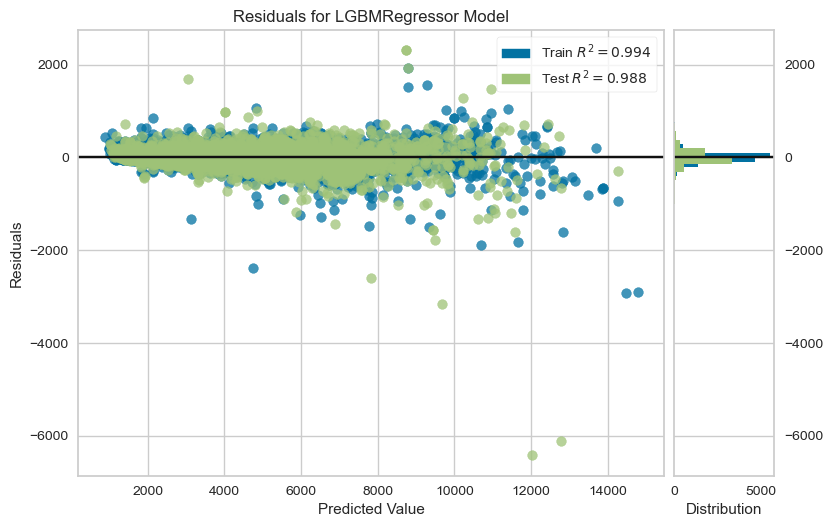

In [7]:
# plot residuals
plot_model(best_model, plot = 'residuals')

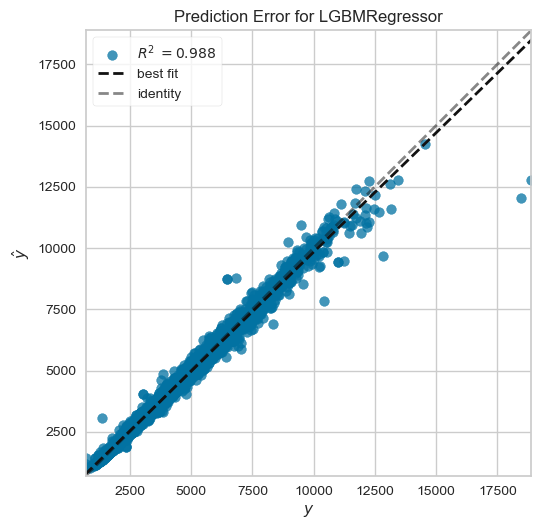

In [9]:
# plot error
plot_model(best_model, plot = 'error')